In [1]:
%matplotlib notebook
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nb = -1
def get_plot():
    global nb
    nb+=1
    return nb
raw_data=pd.read_csv('breast-cancer-wisconsin.data', sep=',',header=None)
for c in raw_data.columns:
    raw_data[c] = raw_data[c].apply(pd.to_numeric, errors='coerce')
data=raw_data[raw_data.notnull().all(axis=1)]
data

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(data.drop([0,10],1), le.fit_transform(data[10]), test_size=0.20, random_state=42)
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((546, 9), (546,)), ((137, 9), (137,)))

## Decision Tree


In [4]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
fitted_dt = dt.fit(X_train,y_train)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,fitted_dt.predict(X_test))

0.927007299270073

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0)
fitted_rf = rf.fit(X_train,y_train)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,fitted_rf.predict(X_test))

0.948905109489051

In [8]:
from sklearn import metrics
fpr,tpr,thr = metrics.roc_curve(y_test, fitted_rf.predict(X_test))
metrics.auc(fpr, tpr)

0.9442383238760367

<IPython.core.display.Javascript object>


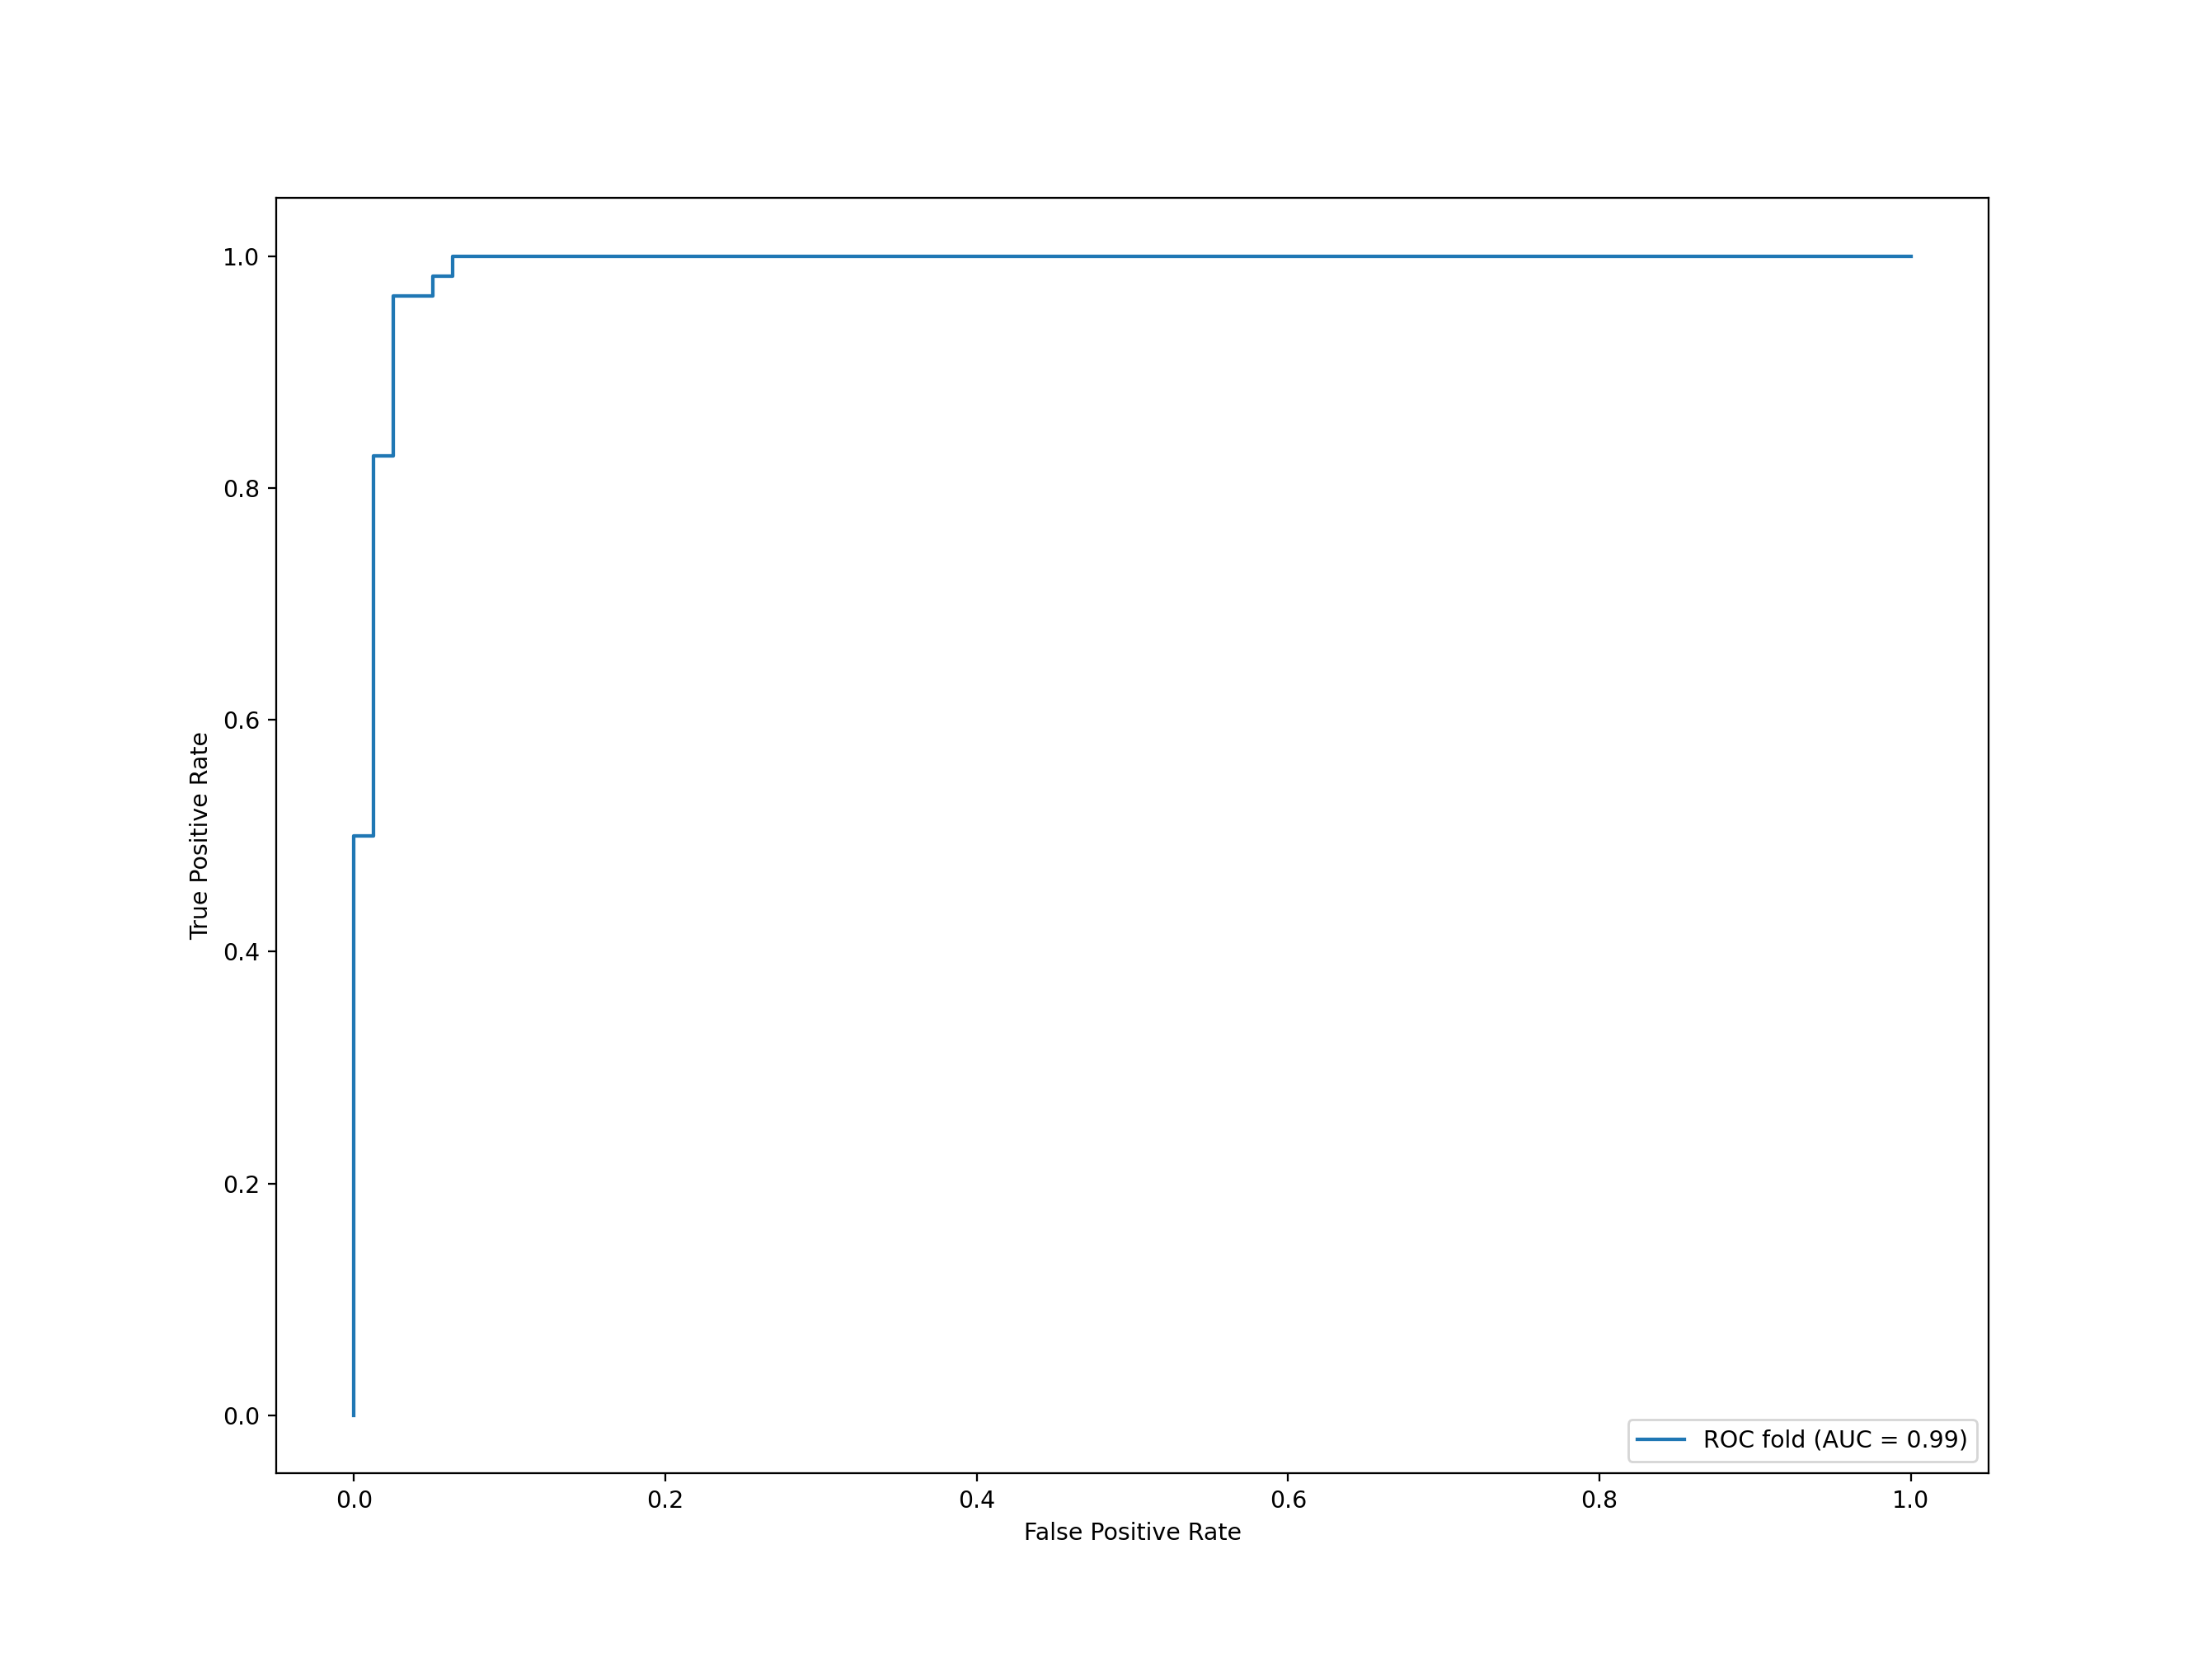

In [9]:
fitted_rf.predict_proba(X_test)

from sklearn.metrics import plot_roc_curve
viz = plot_roc_curve(fitted_rf, X_test, y_test,
                         name='ROC fold')

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True],
     'max_depth': [2, 3],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [3, 5],
     'min_samples_split': [4, 6],
     'n_estimators': [100, 350]
    }

In [17]:
forest_grid_search = GridSearchCV(rf, param_grid, cv=5,
                                  scoring="accuracy",
                                  return_train_score=True,
                                  verbose=True,
                                  n_jobs=-1)

forest_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   21.0s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 3],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 350]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [18]:
forest_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 350}

In [19]:
forest_grid_search.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=350, random_state=0)

In [15]:
from sklearn import metrics
fpr,tpr,thr = metrics.roc_curve(y_test,forest_grid_search.best_estimator_.predict(X_test))
metrics.auc(fpr, tpr)

NameError: name 'forest_grid_search' is not defined

In [ ]:
fpr,tpr

In [ ]:
X_test